In [2]:
from matplotlib import pyplot
from scipy import stats
import numpy as np
from scipy.stats.kde import gaussian_kde
from numpy import linspace
import seaborn as sns
from scipy import stats
##################Extract Output from Output file#########################
n_samples=50#0-49
n_pow=81#0-80

file1 = open("POWER","r+")
Out=file1.read().split()
	
# Number of rows = 50 (ie, number of Samples), each column belongs to a different Samples]
# so, all the rows of a column is my Sample space
CLASS0=[]
CLASS1=[]
i=0
for i in range(n_samples):
	s="CLASS0_SAMPLE"+str(i)
	m=Out.index(s)
	Out=Out[m+1:]
	tem=[]
	for x in range(n_pow):
		s="*POW"+str(x)
		m=Out.index(s)
		tem.append(Out[m+2])
	CLASS0.append(tem)

	s="CLASS1_SAMPLE"+str(i)
	Out=Out[m+1:]
	m=Out.index(s)
	Out=Out[m+1:]
	tem=[]
	for x in range(n_pow):
		s="*POW"+str(x)
		m=Out.index(s)
		tem.append(Out[m+2])
	CLASS1.append(tem)
Samples_c0=[]
Samples_c1=[]
for x in range(len(CLASS0[0])):
	temp0=[]
	temp1=[]
	for i in range(len(CLASS0)):
		temp0.append(float(CLASS0[i][x]))
		temp1.append(float(CLASS1[i][x]))
	Samples_c0.append(temp0)
	Samples_c1.append(temp1)
for i in range(len(Samples_c0)):
	Samples_c0[i].sort()
	Samples_c1[i].sort()

#########################################################

In [3]:
def KDE_pdf(data,N):
    kde = gaussian_kde(data)
    # these are the values over wich your kernel will be evaluated
    dist_space = linspace(min(data), max(data), N)
    X=kde(dist_space)/sum(kde(dist_space))
    return (X,dist_space)
# distspace is the some power values for which probability is given in X

In [4]:
S=KDE_pdf(Samples_c0[0],100)
sum(S[0])

1.0

In [5]:
######## KL DIV starts ###############

In [6]:
import matplotlib.pyplot as pylab
import numpy as np

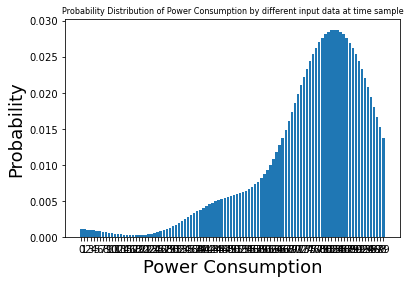

In [56]:
data1 = KDE_pdf(Samples_c1[0],100)[0]

# assert sum(data1)==1.0

pylab.bar(np.arange(len(data1)),data1)
pylab.xlabel('Power Consumption',fontsize=18)
pylab.title('Probability Distribution of Power Consumption by different input data at time sample',fontsize=8)
pylab.ylabel('Probability',fontsize=18)
pylab.xticks(np.arange(len(data1)))
pylab.show()

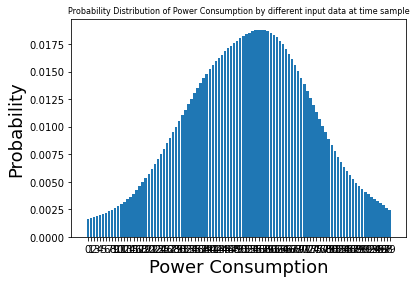

In [61]:
data0 = KDE_pdf(Samples_c0[3],100)[0]
assert sum(data0)==1.0

pylab.bar(np.arange(len(data0)),data0)
pylab.xlabel('Power Consumption',fontsize=18)
pylab.title('Probability Distribution of Power Consumption by different input data at time sample',fontsize=8)
pylab.ylabel('Probability',fontsize=18)
pylab.xticks(np.arange(len(data0)))
pylab.show()

In [69]:
import scipy
Val=[]
Val2=[]
# Wrong : Comparing two differnt time stamps by using 2 different values of i and j
# for i in range(len(Samples_c0)):
#     for j in range(len(Samples_c0)):
#         a=KDE_pdf(Samples_c0[i],100)[0]
#         b=KDE_pdf(Samples_c1[j],100)[0]
#         Val.append(scipy.stats.entropy(a,b))
#         if(scipy.stats.entropy(a,b)>=1849):
#             print(i," ",j)
#         A=stats.ttest_ind(Samples_c0[i], Samples_c1[j], axis=0, equal_var=False)[0]
#         Val2.append(A)

In [74]:
for j in range(len(Samples_c0)):
    a=KDE_pdf(Samples_c0[j],100)[0]
    b=KDE_pdf(Samples_c1[j],100)[0]
    Val.append(scipy.stats.entropy(a,b))
    A=stats.ttest_ind(Samples_c0[j], Samples_c1[j], axis=0, equal_var=False)[0]
    Val2.append(A)
print(" T-test Statistic min=",min(Val2)," max=",max(Val2))
print(" KL div min=",min(Val)," max=",max(Val))

 T-test Statistic min= -1.2480229649892152  max= 0.8617229154685201
 KL div min= 0.00518096479327417  max= 0.3674224476958057


-1.2480229649892152  and max= 0.8617229154685201
64


333.18660996150476

In [17]:
from random import seed
from random import gauss
# seed random number generator
seed(1)
# generate some Gaussian values
data_rand=[]
for _ in range(len(data0)):
    value = abs(gauss(min(data0),max(data0)))
    data_rand.append(value)
#     print(value)


In [11]:
import math
X=scipy.stats.entropy(data1,data_rand)
print(X)
data_rand=[1/len(data1)]*len(data1)
data_rand[1]=1
X=scipy.stats.entropy(data1,data_rand)
# data_rand

1.091622800774688
